In [2]:
import os #  for file operations
import numpy as np #  for numerical processing
import pandas as pd #   data frames
import matplotlib.pyplot as plt #  plotting library
import seaborn as sns #   statistical data visualization
from sklearn.model_selection import train_test_split # modeling
from sklearn.linear_model import LinearRegression # modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #modeling

In [3]:
Data_path = '/'.join(os.path.abspath('').split('/')[:-4])+'automobileEDA.csv'
df = pd.read_csv(Data_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# get features
x = df.drop('price', axis=1) # independent features
y = df['price'] # dependent features

In [5]:
# random_state = shuffles from the fixed position

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

MULTIPLE LINEAR REGRESSION
 - as seen in simple linear regression, we used single independent variable for car price prediction.
 - However, in real world datasets, for accurate prediction of car price, we need to consider multiple features/variables  instead of single one. In such scenario Multiple Linear Regression would be helpful.

 

Predict car price using variables[horsepower, curb-weight, engine-size, highway-mpg]

In [6]:
# get multiple linear regression independent variables
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

x_train_mul = x_train[to_select].values
x_test_mul = x_test[to_select].values


In [7]:
x_train_mul

array([[  95.        , 3285.        ,  120.        ,   24.        ],
       [ 143.        , 2778.        ,  151.        ,   27.        ],
       [  84.        , 2385.        ,  122.        ,   32.        ],
       [ 182.        , 3230.        ,  209.        ,   22.        ],
       [  84.        , 2385.        ,  122.        ,   32.        ],
       [  70.        , 1909.        ,   90.        ,   43.        ],
       [  68.        , 1950.        ,   91.        ,   38.        ],
       [  86.        , 2372.        ,  110.        ,   33.        ],
       [ 160.        , 3139.        ,  181.        ,   25.        ],
       [ 104.25615764, 2460.        ,  132.        ,   31.        ],
       [ 162.        , 3157.        ,  130.        ,   22.        ],
       [  68.        , 1918.        ,   92.        ,   41.        ],
       [  92.        , 2458.        ,  122.        ,   32.        ],
       [ 101.        , 2380.        ,   70.        ,   23.        ],
       [  76.        , 1956.      

In [8]:
x_test_mul

array([[  97., 2302.,  120.,   34.],
       [  68., 1967.,   90.,   38.],
       [  84., 2410.,  122.,   32.],
       [  76., 2024.,   92.,   34.],
       [ 116., 2551.,  146.,   30.],
       [  62., 2040.,   92.,   38.],
       [ 145., 2811.,  156.,   24.],
       [  88., 2328.,  122.,   32.],
       [ 115., 2824.,  136.,   22.],
       [  70., 1874.,   90.,   43.],
       [  92., 2326.,  122.,   34.],
       [  76., 2010.,   92.,   34.],
       [ 116., 2540.,  146.,   30.],
       [ 121., 2710.,  164.,   28.],
       [ 111., 2650.,  108.,   23.],
       [  97., 3075.,  120.,   24.],
       [  58., 1713.,   92.,   54.],
       [ 106., 3217.,  145.,   27.],
       [  69., 1971.,   97.,   37.],
       [  85., 2212.,  109.,   34.],
       [  86., 2304.,  110.,   33.],
       [  70., 2169.,   98.,   34.],
       [ 182., 3505.,  209.,   20.],
       [  95., 3075.,  120.,   24.],
       [  60., 1837.,   79.,   42.],
       [ 176., 4066.,  258.,   19.],
       [ 116., 2679.,  146.,   30.],
 

In [7]:
mult_lm = LinearRegression()
mult_lm.fit(x_train_mul, y_train)

LinearRegression()

In [8]:
y_hat_mul =mult_lm.predict(x_test_mul)
y_hat_mul

array([11457.56050541,  5966.17033563, 11313.13362185,  6839.1134896 ,
       15765.36249767,  6054.89432681, 19193.71110742, 11274.59138528,
       15777.91904404,  5691.34473287, 11447.85995755,  6795.49785034,
       15731.09306683, 18249.41093932, 12386.6765838 , 14052.8739501 ,
        4519.86549286, 17260.71051658,  6704.95557074,  9499.66760217,
        9952.56595445,  7525.5080357 , 28384.20140046, 13944.41355343,
        4025.73928264, 34398.95091589, 16164.13405655,  5950.59966215,
       11759.43681975,  6910.57215579, 16352.28198733, 11956.90118114,
       11361.15231958,  6602.14727822, 22100.15767949, 16693.48286944,
       11944.02890531,  9193.80846495, 22829.02801405, 23489.79780817,
        8526.17956937])

In [9]:
mult_lm.intercept_

-11539.108515802094

In [10]:
mult_lm.coef_

array([ 54.23019834,   3.1154028 ,  93.34038826, -18.71070774])

Estimated Equation of best fi tline is :
- Price = -11539.108515802094 + 54.23019834 * horsepower + 3.1154028 * curb-weight + 93.34038826 * engine-size + -18.71070774 * highway-mpg

Exercise
- Fit Multiple Linear Regression with[engine-size, horsepower] as independent variable to predict car price.
- Fit Multiple Linear Regression with[normalized-losses, highway-mpg] as independent variable to predict car price.

In [15]:
#  Exercise
#  Fit Multiple Linear Regression with[engine-size, horsepower] as independent variable to predict car price.
# get multiple linear regression independent variables
to_select = ['horsepower', 'engine-size']

x_train_mul = x_train[to_select].values
x_test_mul = x_test[to_select].values


In [16]:
mult_lm = LinearRegression()
mult_lm.fit(x_train_mul, y_train)

LinearRegression()

In [17]:
y_hat_mul = mult_lm.predict(x_test_mul)

In [18]:
mult_lm.intercept_

-8499.328552319712

In [19]:
mult_lm.coef_

array([ 64.08477772, 119.67188538])

Estimated Equation of best fit tline is :
- Price = -8499.328552319712 + 64.08477772 * horsepower + 119.67188538 * engine-size

In [20]:
# Exercise
# Fit Multiple Linear Regression with[normalized-losses, highway-mpg] as independent variable to predict car price.
to_select = ['normalized-losses', 'highway-mpg']

x_train_mul = x_train[to_select].values
x_test_mul = x_test[to_select].values

In [21]:
mult_lm = LinearRegression()
mult_lm.fit(x_train_mul, y_train)

LinearRegression()

In [22]:
y_hat_mul = mult_lm.predict(x_test_mul)
y_hat_mul

array([10539.09958308,  7126.02000108, 12224.24991436, 10557.24821556,
       13902.9185912 ,  7169.44708595, 18968.74023219, 12199.61962743,
       20647.40890902,  2934.85771529, 10565.67436635, 10536.50692129,
       13902.9185912 , 15558.90147742, 19853.12206909, 18958.36958506,
       -6390.83174874, 16464.67277403,  7992.25320549, 10546.87756843,
       11398.20296759, 10498.91332544, 22365.61567805, 18958.36958506,
        3778.4051291 , 23196.19978294, 13902.9185912 , 13076.87164442,
       12256.65818665,  8004.56834896, 15613.99554031, 13918.47456189,
       15625.66251834,  7992.25320549, 18935.03562901, 17274.51558466,
       13908.75208021, 11387.18415501, 20670.74286507, 18156.95292522,
        7146.76129534])

In [23]:
mult_lm.intercept_

39354.53006543251

In [24]:
mult_lm.coef_

array([-6.48165446e-01, -8.45491910e+02])

Estimated Equation of best fit tline is :
- Price = 39354.53006543251 - 6.48165446e-01 * normalized-losses - 8.45491910e+02 * highway-mpg

MODEL EVALUATION USING DATA VISUALIZATION
- Now we have developed our simple linear regression and multiple linear regression model.
- how do we evaluate our linear regression either visually or numerically.
- Let's us first evaluate our regression model visually using Regression Plot and Distribution Plot.

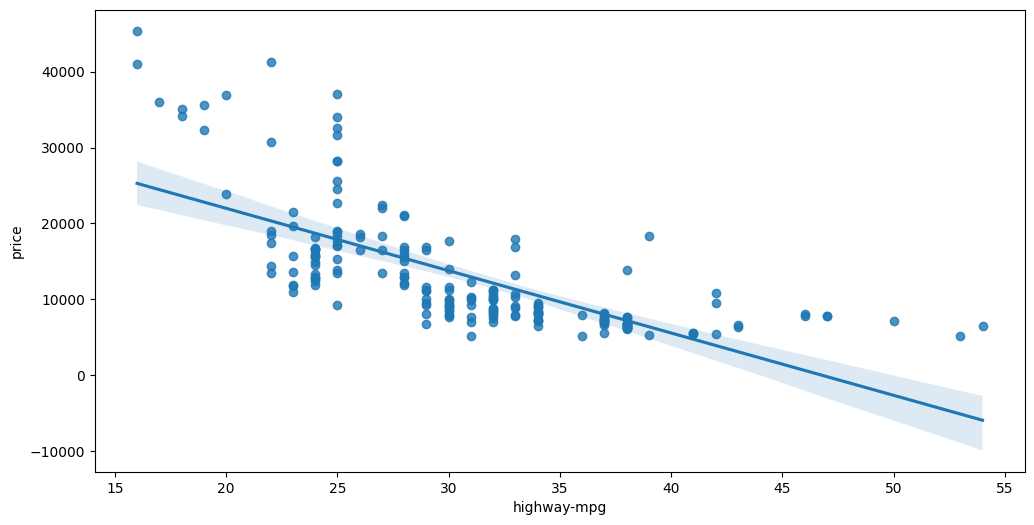

In [26]:
# simple linear regression
plt.figure(figsize=(12, 6))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.show()


- we see slope of the line is negative, which we predicted earlier when fitting linear regression linear line.
- More dispersed is the data point from the linear regression line, it will not be suitable to model such data point with linear regression.
- Hence, if thd data is too far from the line, this linear model might not be the best fit model for this data.
- In the above plot, data is not perfectly linear, so simple polynomial regression can do a better job, since it can capture non-linear data,

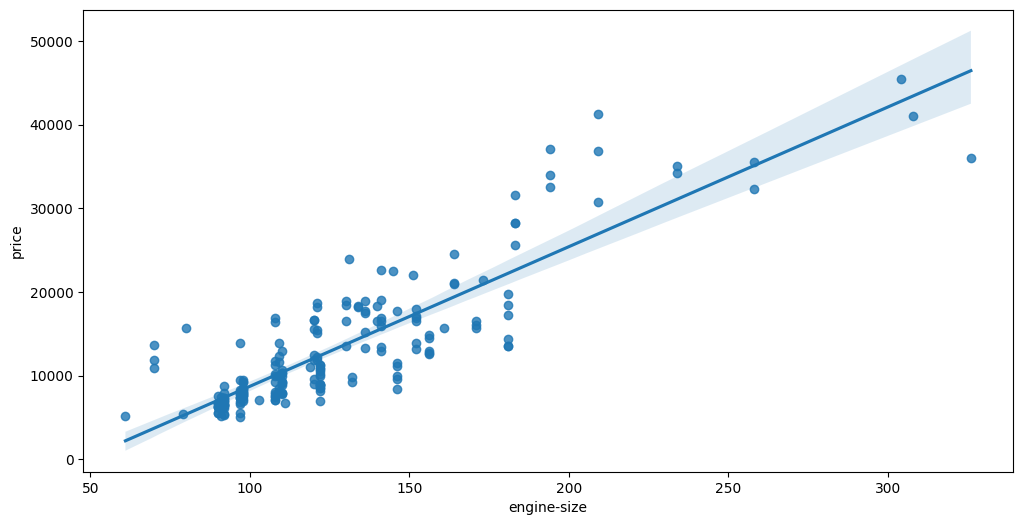

In [27]:
# regression plot
plt.figure(figsize=(12, 6))
sns.regplot(x='engine-size', y='price', data=df)
plt.show()

- This shows that increase in engine-size increases the price of the car i.e. Positive Co-relation.

DISTRIBUTION PLOT
- We successfully visualize simple linear regression model using Regression Plot. It will be complicated for multiple linear regression since there will be multiple independent variables, in such scenarios we could use Distribution plot.
- Now let's visualize our prediction from linear regression model using Distribution Plot.

C:\Users\USER\AppData\Local\Temp\ipykernel_11988\3673862874.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
C:\Users\USER\AppData\Local\Temp\ipykernel_11988\3673862874.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

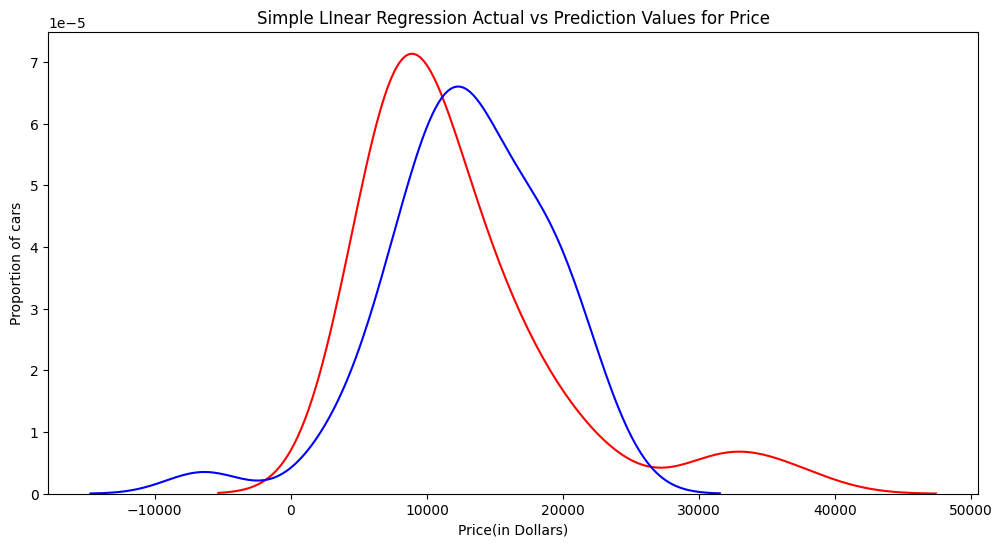

In [28]:
plt.figure(figsize=(12, 6))
ax1 = sns.distplot(y_test, hist=False, color='r', label="Actual value")
sns.distplot(y_hat_mul, hist=False, color='b', label= "Prediction", ax=ax1)

plt.title('Simple LInear Regression Actual vs Prediction Values for Price')
plt.xlabel('Price(in Dollars)')
plt.ylabel('Proportion of cars')
plt.show()
plt.close()

From above 
- Modeling using linear regression is far better than compared to simple linear regression.
- This is because overlapping area of Distribution Plot between Actual and Predicted values is higher incase of Multiple Linear Regression compared to Single Regression.

In [11]:
print("R^2 of multiple linear regression is: ", r2_score(y_test, y_hat_mul))

R^2 of multiple linear regression is:  0.7429274527307541


In [14]:
print("Mean Squared Error is: ", mean_squared_error(y_test, y_hat_mul))

Mean Squared Error is:  13623765.520788323


In [13]:
print("Mean Abs Error is: ", mean_absolute_error(y_test, y_hat_mul))

Mean Abs Error is:  2737.0634011548564


Decision

- It's not always true that increasing number of ndependent variables always improve model.
- But in our scenario, considering R^2 and mean squared error, we came to ci=onclusion that multiple linear regression is better at predicting car price as compared to single linear regression.
- Also, depending on the data nature, we may need to extend  our sample size or use techniques like cross validation.